# Аналіз історичних змін прибутків найбільших компаній США

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

Завантажуємо публічний архів Fortune 500

In [2]:
df = pd.read_csv('fortune500.csv')

In [3]:
print(df)

       Year  Rank                Company  Revenue (in millions)  \
0      1955     1         General Motors                 9823.5   
1      1955     2            Exxon Mobil                 5661.4   
2      1955     3             U.S. Steel                 3250.4   
3      1955     4       General Electric                 2959.1   
4      1955     5                 Esmark                 2510.8   
...     ...   ...                    ...                    ...   
25495  2005   496        Wm. Wrigley Jr.                 3648.6   
25496  2005   497         Peabody Energy                 3631.6   
25497  2005   498  Wendy's International                 3630.4   
25498  2005   499     Kindred Healthcare                 3616.6   
25499  2005   500   Cincinnati Financial                 3614.0   

      Profit (in millions)  
0                      806  
1                    584.8  
2                    195.4  
3                    212.6  
4                     19.1  
...                  

In [4]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [5]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


Перейменуємо стовпці для зручності роботи

In [6]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

Визначимо число рядків в звіті

In [7]:
len(df)

25500

Визначимо типи даних для кожного стовпця

In [8]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

Вибираємо рядки стовпця `profit` які містять не цифри

In [9]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')

In [10]:
print(non_numberic_profits)

0        False
1        False
2        False
3        False
4        False
         ...  
25495    False
25496    False
25497    False
25498    False
25499    False
Name: profit, Length: 25500, dtype: bool


In [11]:
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


Визначимо скільки типів не чисельних даних міститься в стовпці `profit`

In [12]:
set(df.profit[non_numberic_profits])

{'N.A.'}

Визначимо кількість рядків з відсутніми даними

In [13]:
len(df.profit[non_numberic_profits])

369

Це невелика частка нашого набору даних, хоча й не зовсім несуттєва, оскільки вона все ще становить близько 1,5%.

Якщо рядки містять N.A. приблизно рівномірно розподілені роками, найпростішим рішенням було б просто видалити їх. Тож давайте швидко поглянемо на розподіл.

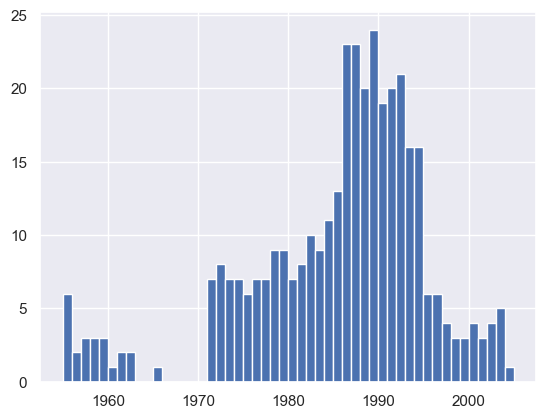

In [14]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

З першого погляду ми бачимо, що найбільше недійсних значень за один рік становить менше 25, і оскільки існує 500 точок даних на рік, видалення цих значень становитиме менше 4% даних для найгірших років. Дійсно, крім сплеску приблизно в 90-х роках, більшість років мають менше половини відсутніх значень піку.

Для наших цілей припустімо, що це прийнятно, і видаліть ці рядки.

In [15]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)

Ми повинні перевірити, чи спрацювало.

In [16]:
len(df)

25131

In [17]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

*Чудово! Ми завершили налаштування набору даних.*

#### Побудова графіків за допомогою matplotlib

Далі ми можемо приступити до вирішення питання, що розглядається, побудувавши графік середнього прибутку за роками. Ми також можемо побудувати графік доходу, тож спочатку ми можемо визначити деякі змінні та метод зменшення нашого коду.

In [18]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

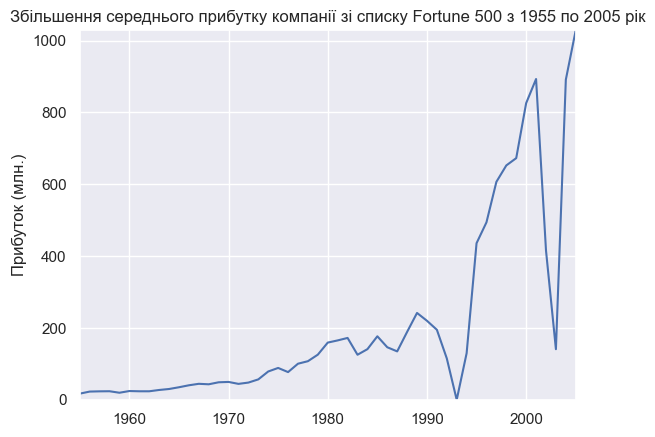

In [19]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Збільшення середнього прибутку компанії зі списку Fortune 500 з 1955 по 2005 рік', 'Прибуток (млн.)')

Це схоже на експоненціальний показник, але він має величезні провали. Вони мають відповідати рецесії початку 1990-х і бульбашці доткомов

Але як так сталося, що прибутки відновлюються до ще вищих рівнів після кожної рецесії?

Можливо, доходи можуть сказати нам більше.

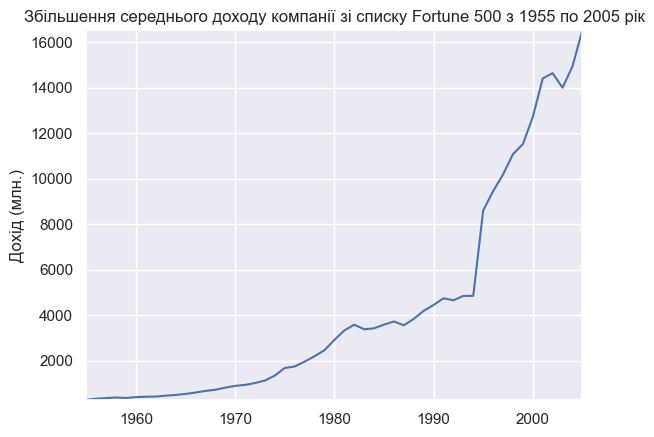

In [20]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Збільшення середнього доходу компанії зі списку Fortune 500 з 1955 по 2005 рік', 'Дохід (млн.)')

Це додає іншу сторону історії. Доходи не постраждали так сильно — це чудова бухгалтерська робота від фінансових відділів.

Накладемо ці графіки з +/- їхніми `стандартними відхиленнями`: [Стандартне відхилення](https://uk.wikipedia.org/wiki/%D0%A1%D1%82%D0%B0%D0%BD%D0%B4%D0%B0%D1%80%D1%82%D0%BD%D0%B5_%D0%B2%D1%96%D0%B4%D1%85%D0%B8%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F)

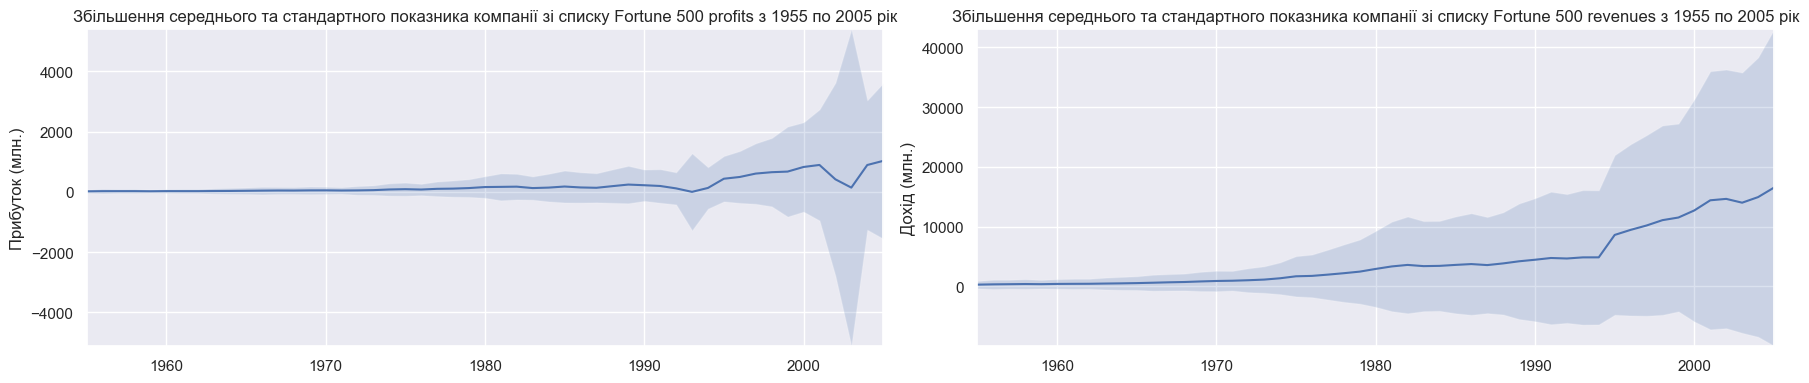

In [21]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Збільшення середнього та стандартного показника компанії зі списку Fortune 500 %s з 1955 по 2005 рік'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Прибуток (млн.)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Дохід (млн.)')
fig.set_size_inches(18, 4)
fig.tight_layout()

Це приголомшливо, стандартні відхилення величезні! Деякі компанії зі списку Fortune 500 заробляють мільярди, а інші втрачають мільярди, і ризик зростає разом із зростанням прибутків протягом багатьох років.

#### Віджети Jupyter

In [22]:
import ipywidgets as widgets
from IPython.display import display

def update_plot(year_range):
    start_year, end_year = year_range
    mask = (x >= start_year) & (x <= end_year)

    fig, ax = plt.subplots(figsize=(10, 6))
    plot(x[mask], y1[mask], ax, f'Збільшення середнього прибутку компанії зі списку Fortune 500 з {start_year} до {end_year}', 'Прибуток (млн.)')
    plt.show()

year_range_slider = widgets.IntRangeSlider(
    value=[1955, 2005],
    min=1955,
    max=2005,
    step=1,
    description='Year range:',
    continuous_update=False
)

widgets.interact(update_plot, year_range=year_range_slider)

interactive(children=(IntRangeSlider(value=(1955, 2005), continuous_update=False, description='Year range:', m…

<function __main__.update_plot(year_range)>